In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path


import sys
sys.path.insert(0, "/home/estengel/ambiguous_parsing/src/")
from ambiguous_parsing.eval.eval import get_df

In [8]:
CHECKPOINT_DIR= Path("/brtx/602-nvme1/estengel/ambiguous_parsing/logs/1.0/") 
# fol
fol_models_and_paths = []
for model in ["350M", "2B", "6B", "16B"]:
    fol_models_and_paths.extend([("pp", f"codegen-{model}_lamp_no_context_all_pp_fol_0_test_eval_constrained_bs_5_np_full"),
    ("scope", f"codegen-{model}_lamp_no_context_all_scope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("revscope", f"codegen-{model}_lamp_no_context_all_revscope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("bound", f"codegen-{model}_lamp_no_context_all_bound_fol_0_test_eval_constrained_bs_5_np_full"),
    ("conj", f"codegen-{model}_lamp_no_context_all_conj_fol_0_test_eval_constrained_bs_5_np_full")
    ])

In [9]:
big_df = []
for amb_type, path in fol_models_and_paths:
    fol_test_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_fol/test.jsonl"
    fol_eval_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_fol/test_eval.jsonl"
    pred_path = CHECKPOINT_DIR / path
    try:
        print(model, amb_type)
        df = get_df(fol_test_path, fol_eval_path, pred_path, is_fol=True)
        model = path.split("_")[0]
        df['model'] = model
        df['amb_type'] =  amb_type
        # df['model_order'] = model_order.index(model_name)
        df['is_fol'] = True
        big_df.append(df)
    except (FileNotFoundError, IndexError, AssertionError) as e:
        print(f"Skipping {amb_type}")
        continue

big_df = pd.concat(big_df)

16B pp
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-350M scope
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-350M revscope
6 = 3.00 are missing a first output
7 = 3.50 are missing a second output
codegen-350M bound
1 = 0.50 are missing a first output
1 = 0.50 are missing a second output
codegen-350M conj
7 = 3.50 are missing a first output
25 = 12.50 are missing a second output
codegen-350M pp
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-2B scope
Skipping scope
codegen-2B revscope
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-2B bound
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-2B conj
0 = 0.00 are missing a first output
3 = 1.50 are missing a second output
codegen-2B pp
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-6B scope
5 = 2.50 are missing a first output
7 = 3.50 are mi

In [23]:
big_df.head()

,type,key,value,model,amb_type,is_fol
0,pp,pred_top_1_matches_correct,60,codegen-16B,pp,True
1,pp,pred_top_2_matches_correct,23,codegen-16B,pp,True
2,pp,pred_top_1_matches_other,0,codegen-16B,pp,True
3,pp,pred_top_2_matches_other,0,codegen-16B,pp,True
4,pp,pred_top_1_matches_either,60,codegen-16B,pp,True


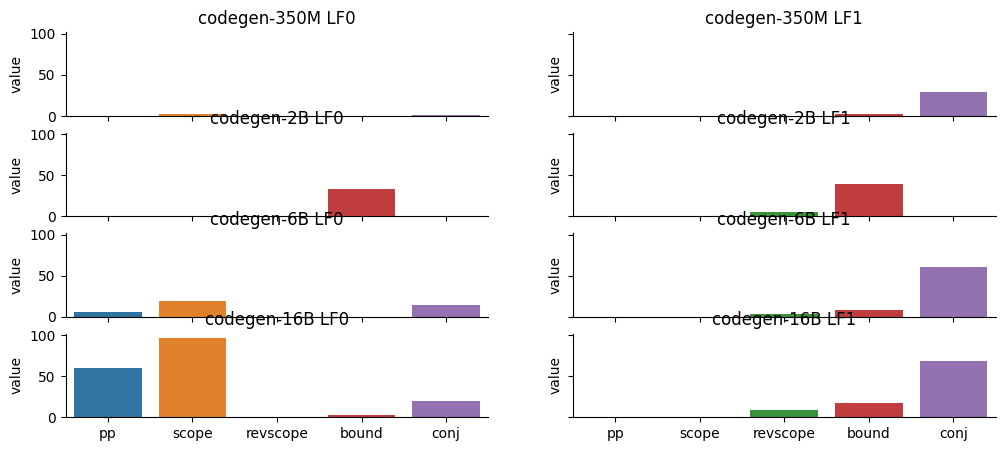

In [14]:
fig, ax = plt.subplots(4, 2, figsize = (12, 5), sharex=True, sharey=True)

for i, model in enumerate(["codegen-350M", "codegen-2B", "codegen-6B", "codegen-16B"]):
    local_df = big_df[big_df['model'] == model]
    lf1_df = local_df[local_df['key'] == "pred_top_1_matches_correct"]
    lf2_df = local_df[local_df['key'] == "pred_top_1_matches_other"]
    sns.barplot(data = lf1_df, x = "amb_type", y = "value", ax = ax[i, 0])
    sns.barplot(data = lf2_df, x = "amb_type", y = "value", ax = ax[i, 1])
    ax[i,0].set_xlabel("")
    ax[i,1].set_xlabel("")
    ax[i,0].set_title(f"{model} LF0")
    ax[i,1].set_title(f"{model} LF1")

sns.despine()

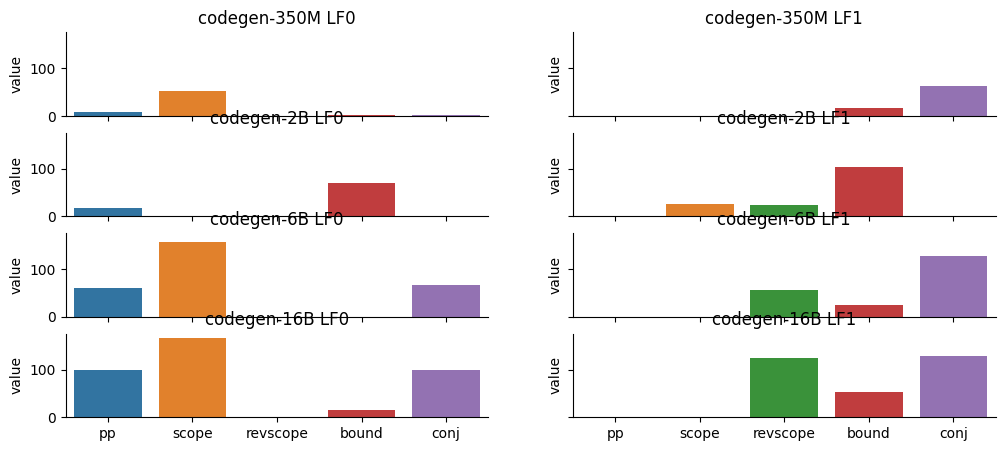

In [15]:
fig, ax = plt.subplots(4, 2, figsize = (12, 5), sharex=True, sharey=True)

for i, model in enumerate(["codegen-350M", "codegen-2B", "codegen-6B", "codegen-16B"]):
    local_df = big_df[big_df['model'] == model]
    lf1_df = local_df[local_df['key'] == "correct_in_top_k"]
    lf2_df = local_df[local_df['key'] == "other_in_top_k"]
    sns.barplot(data = lf1_df, x = "amb_type", y = "value", ax = ax[i, 0])
    sns.barplot(data = lf2_df, x = "amb_type", y = "value", ax = ax[i, 1])
    ax[i,0].set_xlabel("")
    ax[i,1].set_xlabel("")
    ax[i,0].set_title(f"{model} LF0")
    ax[i,1].set_title(f"{model} LF1")

sns.despine()